<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**План исследования данных оттока клиентов «Бета-Банка»:**

1) Подготовить данные:
 - Загрузить данные из таблиц 'gold_industry_train.csv', 'gold_industry_test.csv', 'gold_industry_full.csv' изучить общую информацию.
 - Проверить, что эффективность обогащения рассчитана правильно. Вычислить её на обучающей выборке для признака rougher.output.recovery. Найти MAE между расчётами и значением признака. Описать выводы.
 - Проанализировать признаки, недоступные в тестовой выборке.
 - Провести предобработку данных. 

2) Проанализировать данные:
 - Посмотреть, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? Описать выводы.
 - Сравнить распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
 - Исследовать суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

3) Построить модель:
 - Написать функцию для вычисления итоговой sMAPE.
 - Обучить разные модели и оценить их качество кросс-валидацией. Выбрать лучшую модель и проверить её на тестовой выборке.
 - Описать выводы.

4) Написать промежуточные и общий вывод по результатам исследования.

**Технологический процесс**

Как золото получают из руды?
Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

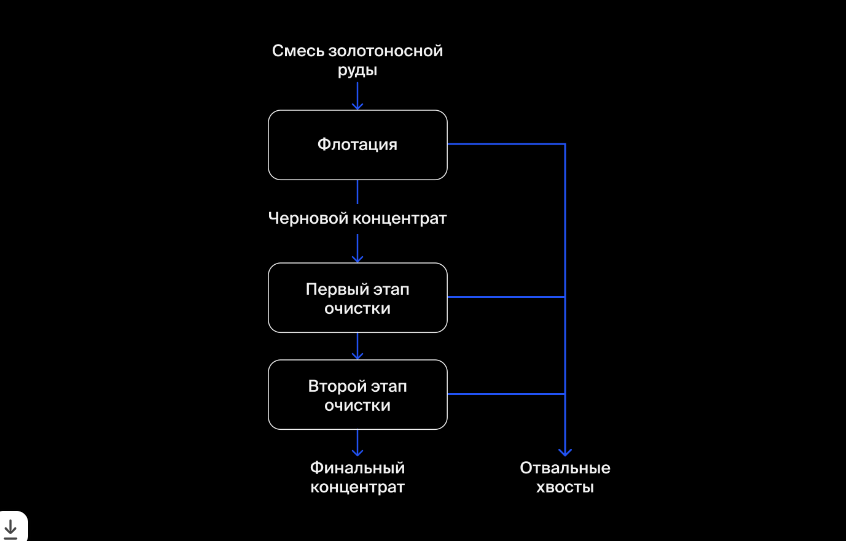

***Опишем каждую стадию:***

1. Флотация:

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

2. Очистка:

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

**Описание данных**

***Технологический процесс:***

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

***Параметры этапов:***

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

***Наименование признаков:***

Наименование признаков должно быть такое:
- [этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

***Расчёт эффективности:***

Необходимо смоделировать процесс восстановления золота из золотосодержащей руды.

Эффективность обогащения рассчитывается по формуле:

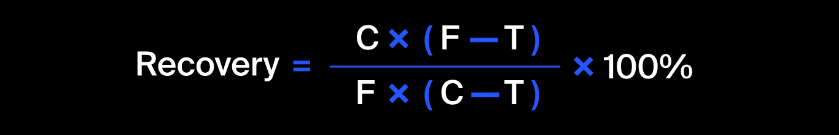

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

***Метрика качества***

Для решения задачи используем метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

Метрика sMAPE вычисляется так:

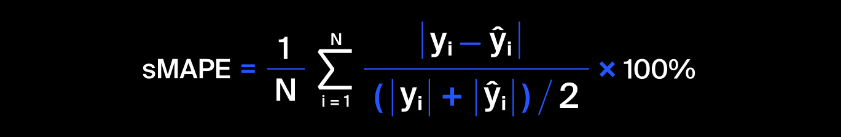

Обозначения:

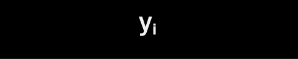
- Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.

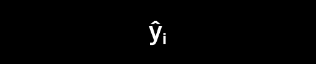
- Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.

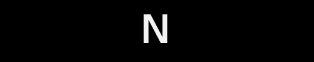
- Количество объектов в выборке.

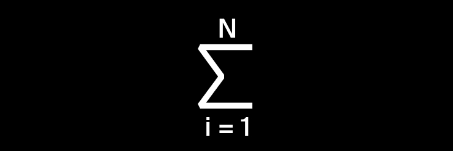
- Суммирование по всем объектам выборки (i меняется от 1 до N).

Нужно спрогнозировать сразу две величины:
- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

Итоговая метрика складывается из двух величин:

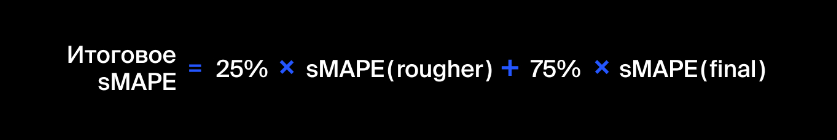

## Подготовка данных

**1.1. Изучим общую информацию о данных.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, make_scorer

In [2]:
try:
    df_train = pd.read_csv('/datasets/gold_industry_train.csv', sep=',')
    df_test = pd.read_csv('/datasets/gold_industry_test.csv', sep=',')
    df_full = pd.read_csv('/datasets/gold_industry_full.csv', sep=',')
except:
    df_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_train.csv', sep=',')
    df_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_test.csv', sep=',')
    df_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_full.csv', sep=',')

In [3]:
def df_info(df):
    display(df.shape)
    print(100*"/")
    df.info()
    print(100*"/")
    display(df.describe())
    print(100*"/")
    display('Доля пропусков по каждому столбцу:', (round(df.isna().sum()/df.shape[0]*100, 2)).sort_values(ascending=False))
    print(100*"/")
    print('Доля строк с хотябы одним пропущенным значением:', \
          round(sum(df.apply(lambda x: sum(x.isnull().values), axis = 1)>0)/len(df)*100, 2), '%')
    print(100*"/")
    display('Количество дубликатов:', df.duplicated().sum())
    print(100*"/")

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df_info(df_full)
#(19439, 87)

(19439, 87)

////////////////////////////////////////////////////////////////////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   1940

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19395.000000,18986.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,19439.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439

////////////////////////////////////////////////////////////////////////////////////////////////////


'Доля пропусков по каждому столбцу:'

secondary_cleaner.output.tail_sol                     8.99
rougher.input.floatbank11_xanthate                    2.33
rougher.state.floatbank10_e_air                       2.24
primary_cleaner.output.concentrate_sol                1.90
secondary_cleaner.state.floatbank2_a_air              1.13
final.output.concentrate_sol                          1.09
rougher.input.feed_size                               0.75
primary_cleaner.output.concentrate_pb                 0.60
primary_cleaner.input.xanthate                        0.54
final.output.tail_pb                                  0.52
rougher.input.feed_sol                                0.51
rougher.input.feed_pb                                 0.51
primary_cleaner.output.tail_sol                       0.32
rougher.input.floatbank11_sulfate                     0.23
primary_cleaner.input.depressant                      0.19
rougher.input.floatbank10_sulfate                     0.17
primary_cleaner.input.sulfate                         0.

////////////////////////////////////////////////////////////////////////////////////////////////////
Доля строк с хотябы одним пропущенным значением: 17.21 %
////////////////////////////////////////////////////////////////////////////////////////////////////


'Количество дубликатов:'

0

////////////////////////////////////////////////////////////////////////////////////////////////////


**В полной выборке (df_full) 19439 объектов и 87 колонок, из них 2 целевых признака 'rougher.output.recovery' и 'final.output.recovery'. Доля строк с хотябы одним пропущенным значением: 17.21 %**

In [6]:
df_info(df_train)
#(14579, 87)

(14579, 87)

////////////////////////////////////////////////////////////////////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   1454

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14150.000000,14579.000000,14579.000000,14579.000000,14543.000000,14172.000000,1.457800e+04,14578.000000,14578.000000,14579.000000,14579.000000,14579.000000,14579.000000,14561.000000,14579.000000,14579.000000,14578.000000,14579.000000,14579.000000,14556.000000,14551.000000,14579.000000,14518.000000,1.457600e+04,14579.000000,1.457600e+04,14579.000000,1.457900e+04,14579.000000,1.457800e+04,14579.000000,14579.000000,14579.000000,14491.000000,14314.000000,14579.000000,14575.000000,14573.000000,14534.000000,14485.000000,14579.000000,14557.000000,14579.000000,14567.000000,14579.000000,14579.000000,14579.000000,14574.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14578.000000,14579.000000,14579.000000,14578.000000,14575.000000,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579

////////////////////////////////////////////////////////////////////////////////////////////////////


'Доля пропусков по каждому столбцу:'

secondary_cleaner.output.tail_sol                     6.31
rougher.state.floatbank10_e_air                       2.94
rougher.input.floatbank11_xanthate                    2.79
primary_cleaner.output.concentrate_sol                1.82
final.output.concentrate_sol                          1.32
rougher.input.feed_size                               0.69
secondary_cleaner.state.floatbank2_a_air              0.64
primary_cleaner.output.concentrate_pb                 0.60
rougher.input.feed_sol                                0.53
final.output.tail_pb                                  0.51
rougher.input.feed_pb                                 0.49
primary_cleaner.input.xanthate                        0.42
primary_cleaner.output.tail_sol                       0.31
rougher.input.floatbank11_sulfate                     0.25
rougher.input.floatbank10_sulfate                     0.21
primary_cleaner.input.depressant                      0.19
primary_cleaner.input.sulfate                         0.

////////////////////////////////////////////////////////////////////////////////////////////////////
Доля строк с хотябы одним пропущенным значением: 15.38 %
////////////////////////////////////////////////////////////////////////////////////////////////////


'Количество дубликатов:'

0

////////////////////////////////////////////////////////////////////////////////////////////////////


**В обучающей выборке (df_train) 14579 объектов и 87 колонок, из них 2 целевых признака 'rougher.output.recovery' и 'final.output.recovery'. Доля строк с хотябы одним пропущенным значением: 15.38 %**

In [7]:
df_info(df_test)
#(4860, 53)

(4860, 53)

////////////////////////////////////////////////////////////////////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4860.000000,4860.000000,4853.000000,4860.000000,4860.000000,4860.000000,4852.000000,4814.000000,4859.000000,4851.000000,4860.000000,4817.000000,4859.000000,4859.000000,4859.000000,4859.000000,4858.000000,4859.000000,4858.000000,4859.000000,4734.000000,4859.000000,4859.000000,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,1312.346061,-472.506533,1291.638282,-472.902514,1204.066585,-473.380689,1075.304980,-471.465792,1023.769668,-471.412834,11.969074,6.119323,143.201672,8.692446,7.305514,1.007577,1588.387039,-488.223175,1589.297134,-490.255893,1588.905465,-489.741555,1530.287801,-485.896489,29.488451,-499.504602,24.732293,-499.556727,2.889647e+01,-489.475315,2.263273e+01,-494.765779,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,159.001709,49.376824,180.203670,47.611728,184.547737,47.828848,159.989533,51.413832,147.827669,51.838763,3.456113,1.049065,42.360060,3.169592,0.588602,0.494669,124.942960,36.672631,132.102797,35.203702,132.689236,33.650676,256.268884,43.296128,5.357783,43.284386,5.484220,43.619785,6.159087e+00,51.827314,5.456797e+00,40.681493,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,767.656587,-649.997496,831.537936,-552.657032,706.281918,-648.118446,695.211786,-598.926149,539.633937,-649.376184,0.000163,0.002616,7.329299,0.000000,4.970000,0.000154,314.241165,-653.477578,319.959489,-799.260788,273.536823,-709.213816,131.321672,-799.791618,0.122013,-799

////////////////////////////////////////////////////////////////////////////////////////////////////


'Доля пропусков по каждому столбцу:'

secondary_cleaner.state.floatbank2_a_air      2.59
rougher.input.floatbank11_xanthate            0.95
rougher.input.feed_size                       0.91
primary_cleaner.input.xanthate                0.88
rougher.input.feed_pb                         0.58
rougher.input.feed_sol                        0.45
primary_cleaner.input.depressant              0.19
rougher.input.floatbank11_sulfate             0.16
rougher.state.floatbank10_e_air               0.14
rougher.input.feed_rate                       0.08
rougher.input.floatbank10_sulfate             0.06
primary_cleaner.state.floatbank8_d_air        0.04
primary_cleaner.state.floatbank8_c_air        0.04
primary_cleaner.state.floatbank8_d_level      0.02
secondary_cleaner.state.floatbank3_a_level    0.02
secondary_cleaner.state.floatbank2_a_level    0.02
secondary_cleaner.state.floatbank2_b_air      0.02
secondary_cleaner.state.floatbank2_b_level    0.02
secondary_cleaner.state.floatbank3_a_air      0.02
secondary_cleaner.state.floatba

////////////////////////////////////////////////////////////////////////////////////////////////////
Доля строк с хотябы одним пропущенным значением: 6.65 %
////////////////////////////////////////////////////////////////////////////////////////////////////


'Количество дубликатов:'

0

////////////////////////////////////////////////////////////////////////////////////////////////////


**В тестовой выборке (df_test) 4860 объектов и 53 колонки, при этом нет 32 признака из обучающей и полной выборок и 2-х целевых признака 'rougher.output.recovery' и 'final.output.recovery'. Как указано в описании проекта некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Исходя из этого для обучения модели нужно из обучающей выборки удалить признаки, которые не входят в тестовую выборку, а в тестовую выборку добавить целевые признаки. Доля строк с хотябы одним пропущенным значением: 6.65 %**

In [8]:
df_full['date']= pd.to_datetime(df_full['date'], format='%Y.%m.%d %H:%M:%S')
df_train['date']= pd.to_datetime(df_train['date'], format='%Y.%m.%d %H:%M:%S')
df_test['date']= pd.to_datetime(df_test['date'], format='%Y.%m.%d %H:%M:%S')

**Для удобства установим столбец с датами в качестве индексного**

In [9]:
df_full = df_full.set_index('date')
df_train = df_train.set_index('date')
df_test = df_test.set_index('date')

**Добавим в тестовую выборку целевые признаки**

In [10]:
df_test_new = df_test.join(df_full[['final.output.recovery', 'rougher.output.recovery']])

In [11]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4860 entries, 2017-12-09 14:59:59 to 2018-08-18 10:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       4860 non-null   float64
 1   rougher.input.feed_ag                       4860 non-null   float64
 2   rougher.input.feed_pb                       4832 non-null   float64
 3   rougher.input.feed_sol                      4838 non-null   float64
 4   rougher.input.feed_rate                     4856 non-null   float64
 5   rougher.input.feed_size                     4816 non-null   float64
 6   rougher.input.floatbank10_sulfate           4857 non-null   float64
 7   rougher.input.floatbank10_xanthate          4859 non-null   float64
 8   rougher.state.floatbank10_a_air             4859 non-null   float64
 9   rougher.state.floatbank10_a_level           4859 

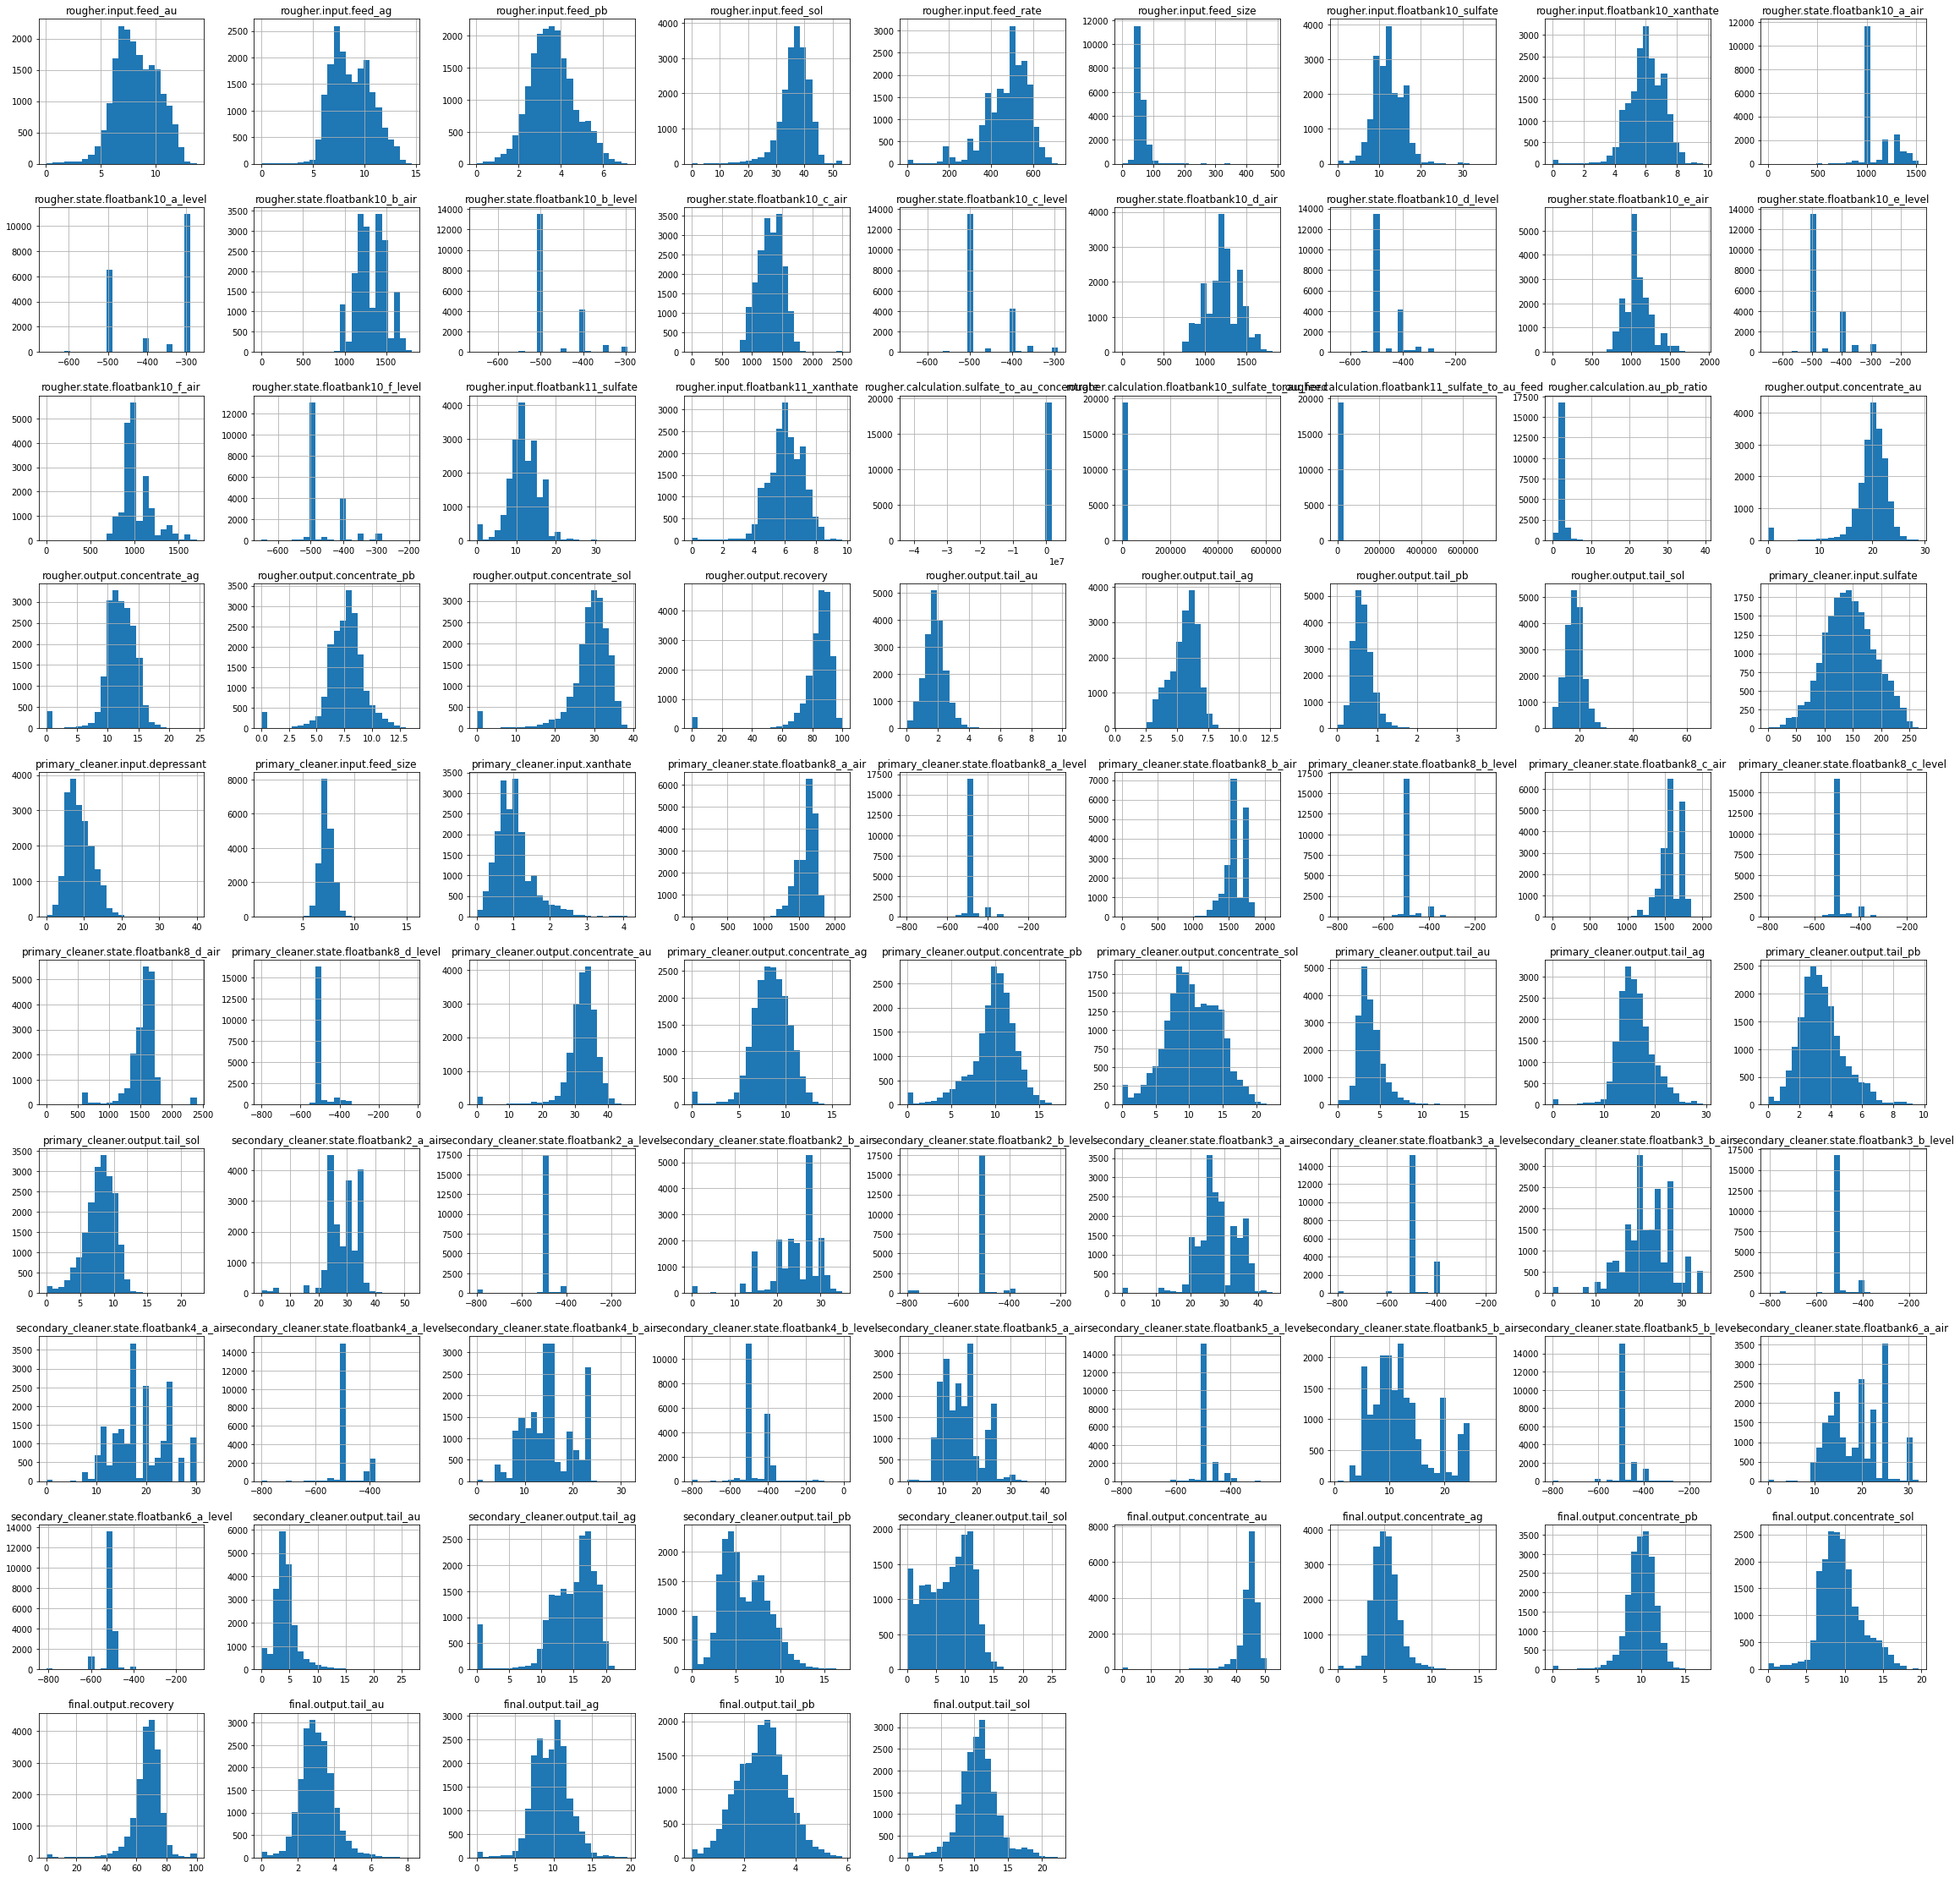

In [12]:
df_full.hist(figsize=(40, 40), bins=25);

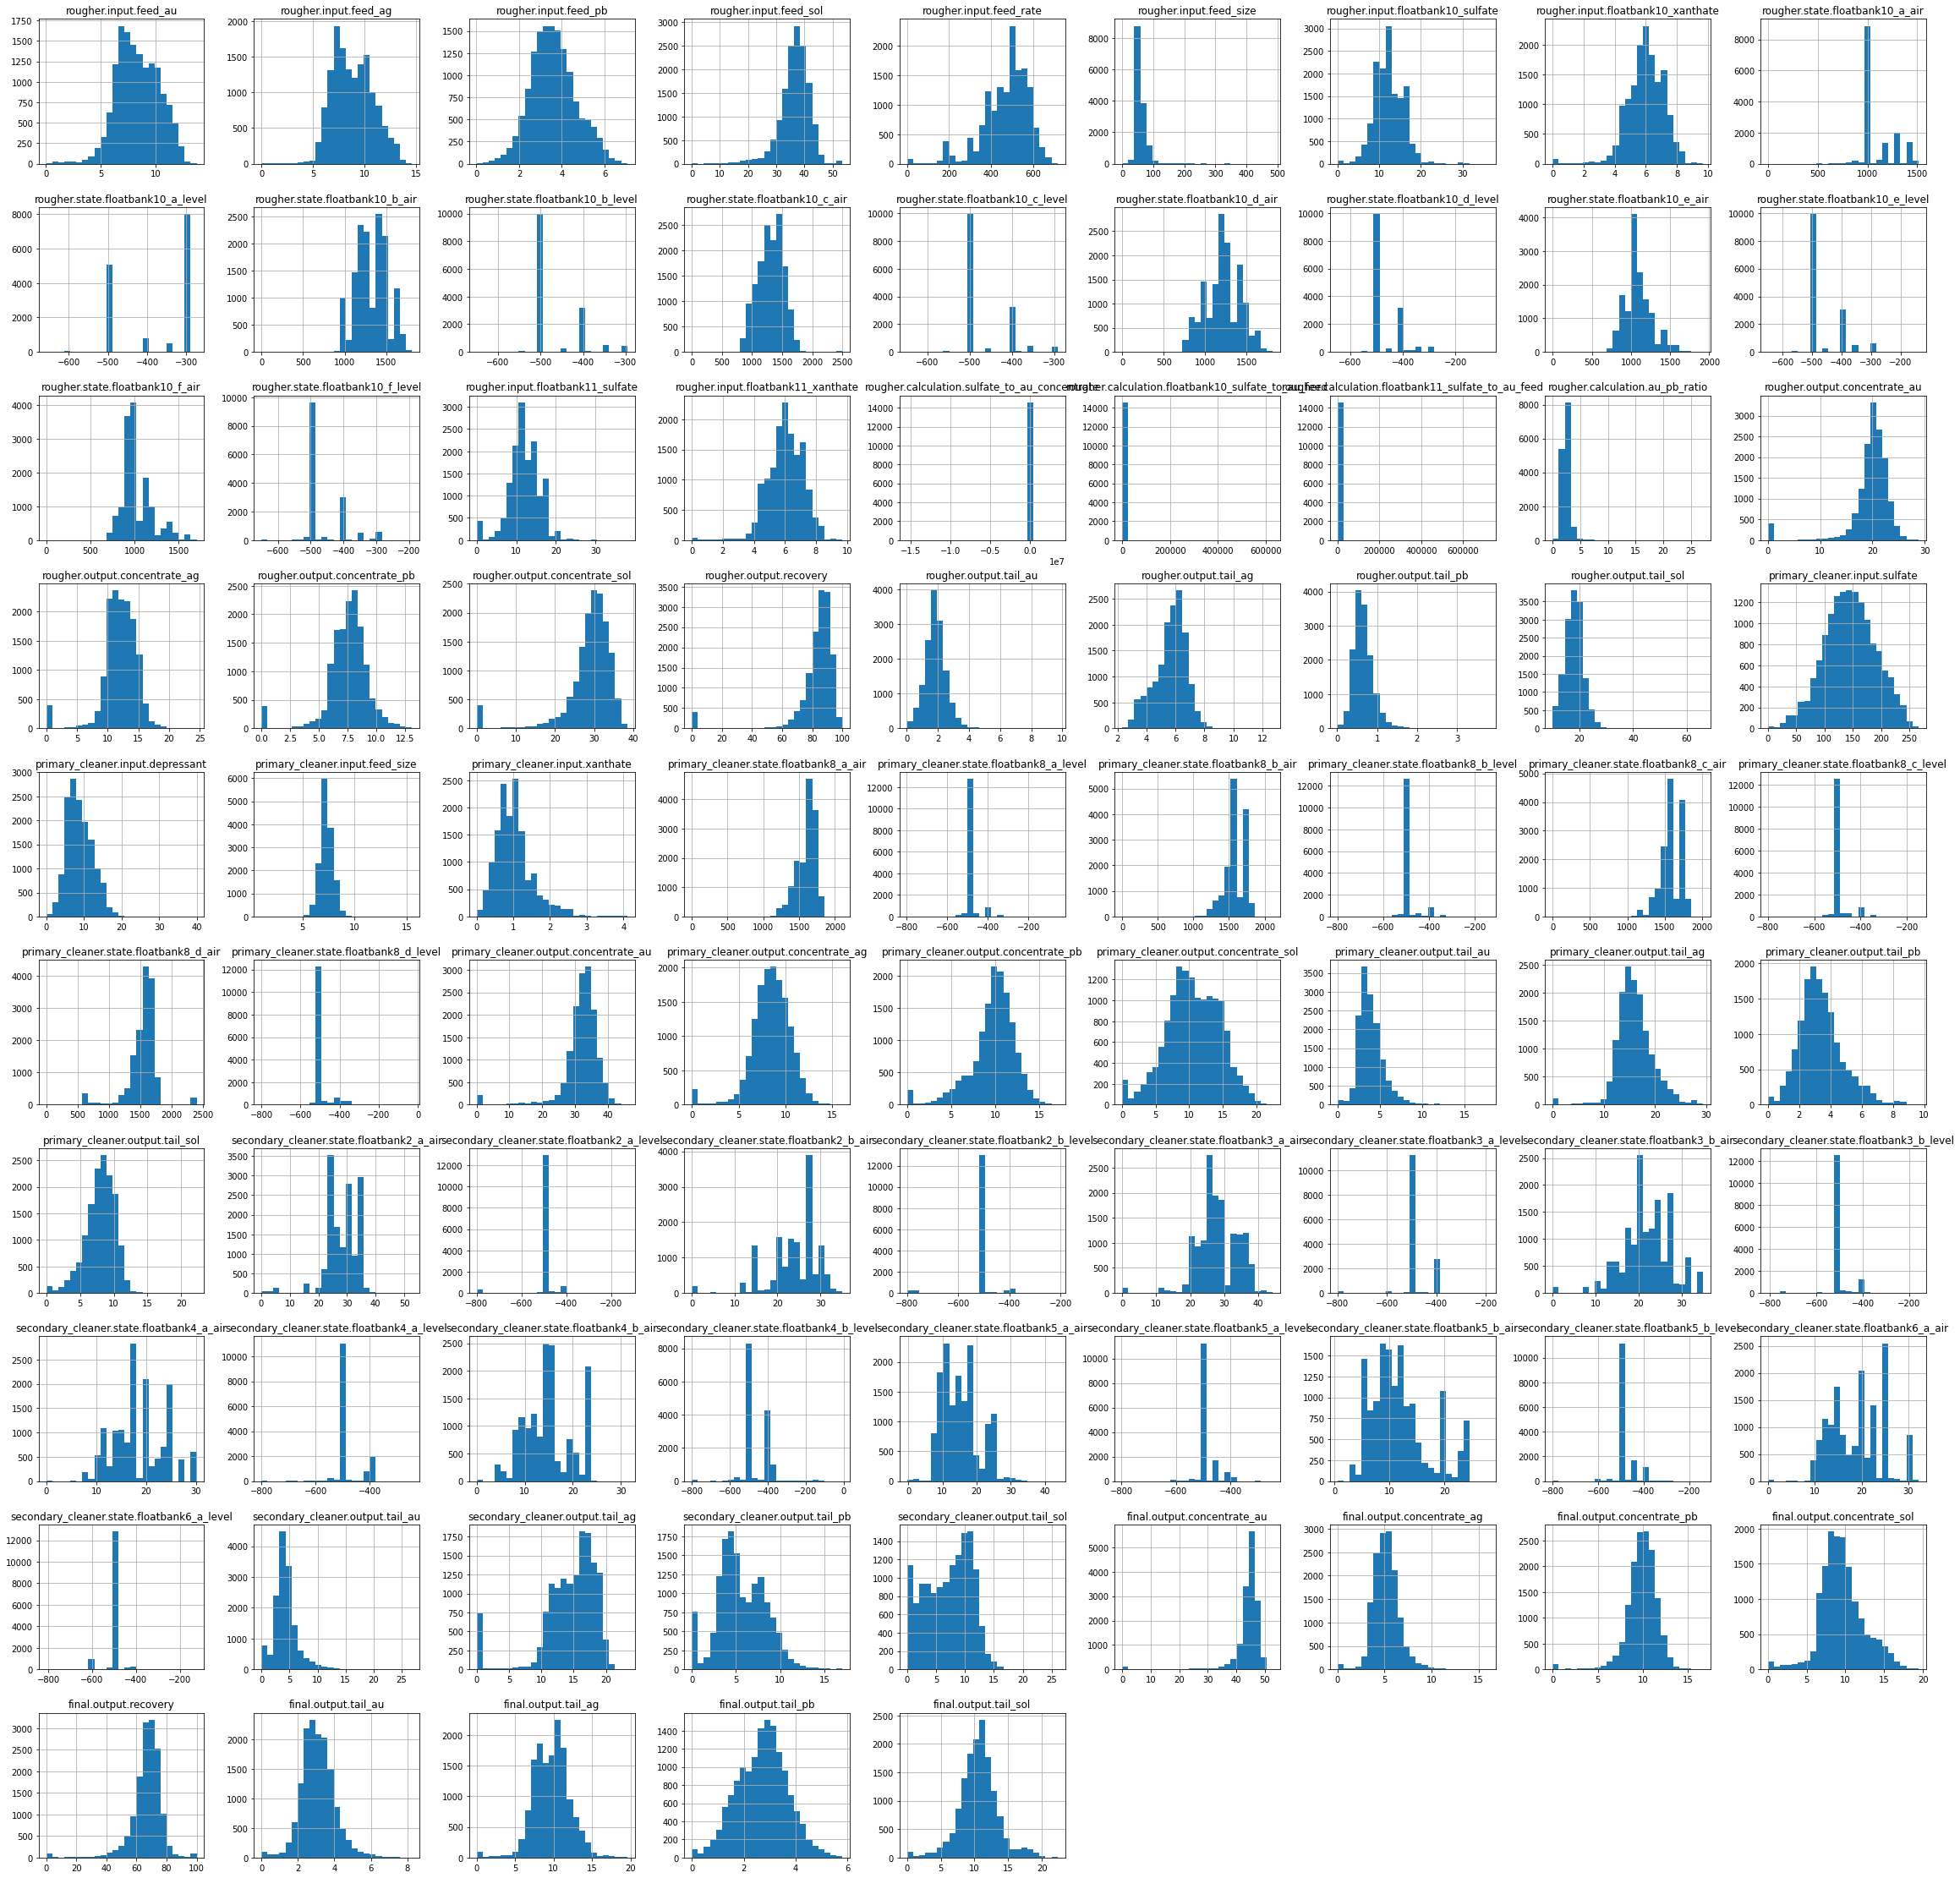

In [13]:
df_train.hist(figsize=(40, 40), bins=25);

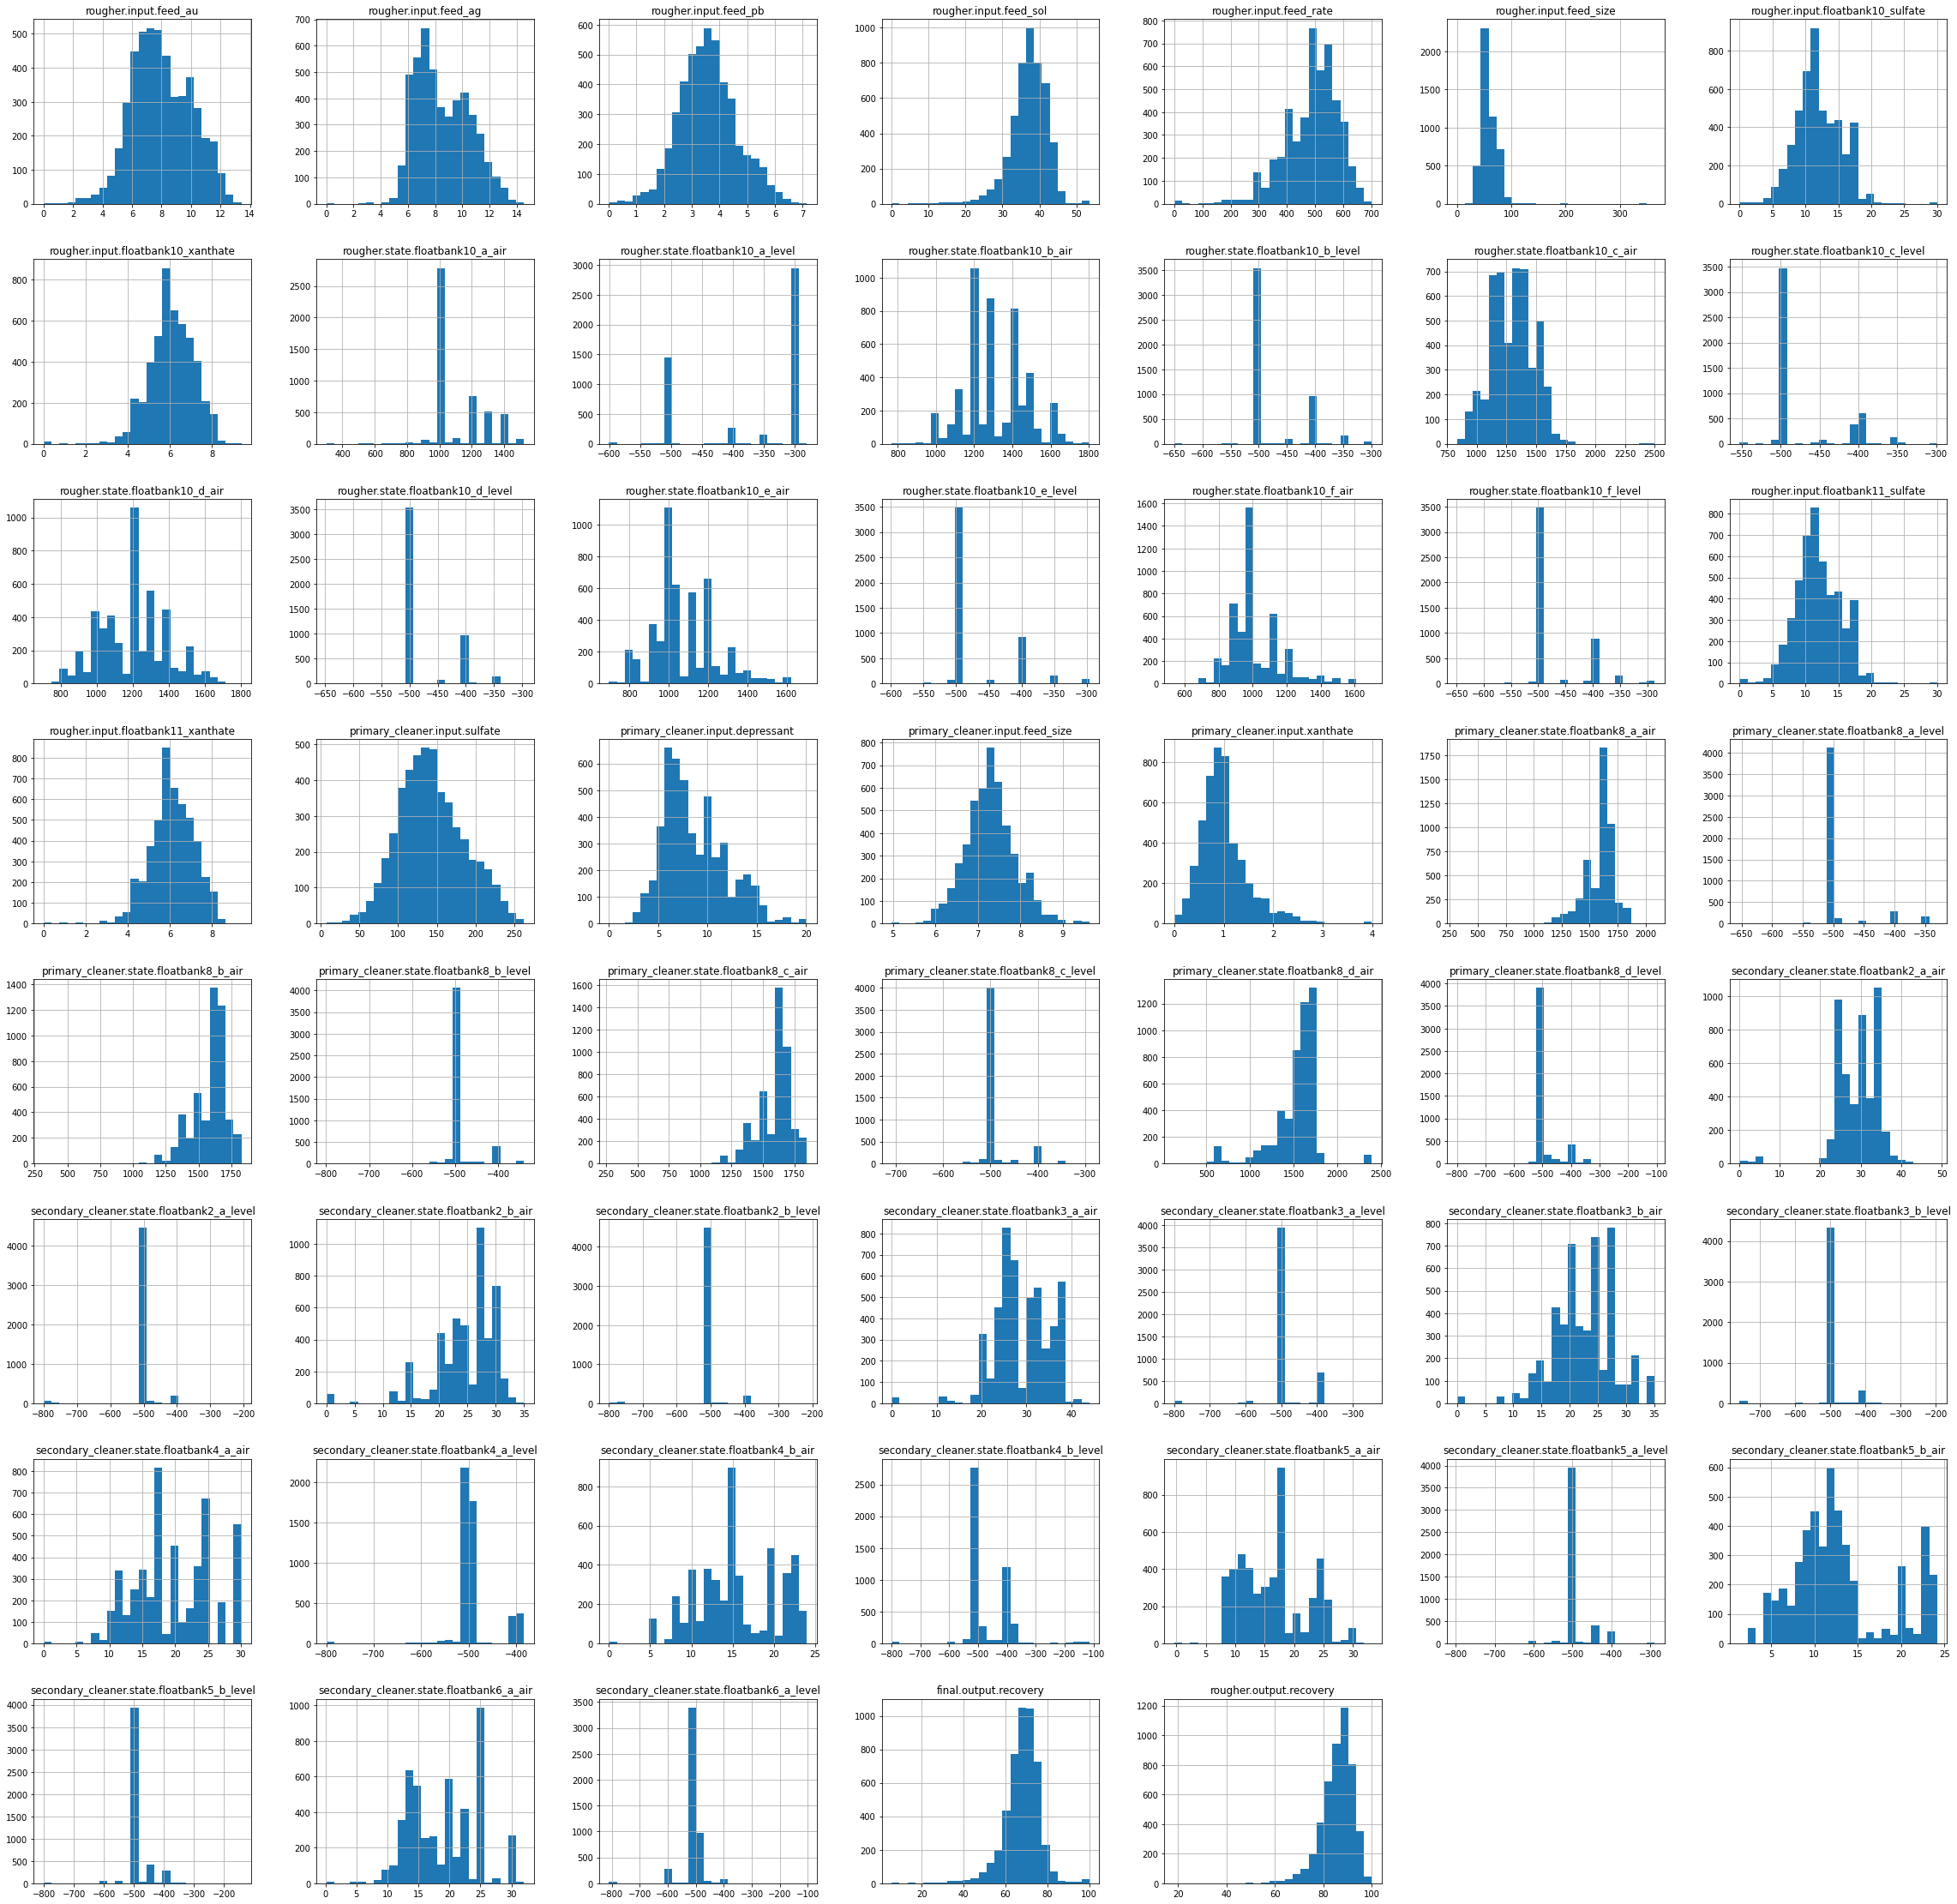

In [14]:
df_test_new.hist(figsize=(40, 40), bins=25);

**На каждом этапе в полной и обучающей выборке у определенных параметров присутствует значительное количество нулевых значений. В тестовой выборке нулевых значений меньше.**

In [15]:
display(df_train.head(1))
df_train.tail(1)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15,6.48615,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.00799,999.706909,-404.066986,1603.011353,-434.715027,1602.375,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.35498,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.91214,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.89366,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198,2.606185,14.500184,4.694824,8.764648,42.19202,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-09 13:59:59,4.525061,5.970515,4.020002,40.074026,555.682872,122.26269,6.58602,9.299606,1204.866639,-299.235675,1149.942902,-501.717903,1049.60439,-500.549053,952.702732,-502.352296,849.016017,-500.505677,850.455635,-506.897968,6.58413,9.300133,44585.181334,2510.813545,2510.142433,1.125637,15.111231,8.523497,8.955135,22.786467,88.890579,0.685059,4.05001,0.636095,18.32308,105.666118,7.955111,6.5,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,1649.772714,-399.831902,31.856742,7.128896,12.633558,7.9419,2.612231,22.298149,6.27825,4.457457,35.003586,-501.083794,29.990533,-611.855898,25.948429,-500.067268,22.968268,-499.839442,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,0.0,0.0,0.0,0.0,46.795691,3.109998,11.434366,6.886013,67.002189,1.596616,8.529606,2.911418,11.115147


In [16]:
display(df_test.head(1))
df_test.tail(1)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.5,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.83189,-400.586116,1649.464582,-400.673303,34.940919,-500.15051,30.031867,-500.328335,26.03399,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.93949,12.990306,-500.080993,19.990336,-499.191575


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-18 10:59:59,6.633002,5.908793,2.440899,36.95854,573.076049,58.509262,13.707775,6.820245,1000.589156,-398.879586,1598.97525,-451.238638,1600.058139,-451.271448,1610.182874,-450.46019,1399.194663,-450.332681,1399.63829,-450.198722,13.812674,6.790624,138.120409,12.464032,7.25,0.898779,1603.436598,-499.8644,1597.455353,-500.266905,1600.747882,-500.541002,1599.754053,-499.216962,26.05951,-499.151646,23.93457,-499.351758,23.994184,-500.078566,23.924481,-499.989024,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


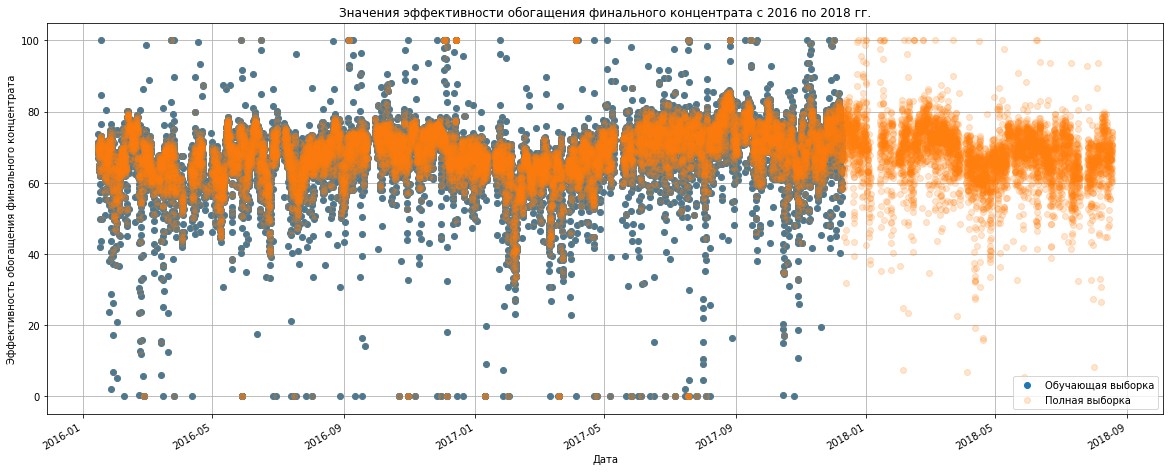

In [17]:
plt.figure(figsize=(15, 8))

df_train['final.output.recovery'].plot(grid=True, style='o', figsize=(20, 8), label='Обучающая выборка');
df_full['final.output.recovery'].plot(grid=True, style='o', figsize=(20, 8), alpha = 0.2, label='Полная выборка');

plt.xlabel('Дата')
plt.ylabel('Эффективность обогащения финального концентрата')
plt.title("Значения эффективности обогащения финального концентрата с 2016 по 2018 гг.")
plt.legend(loc='lower right')
plt.show()

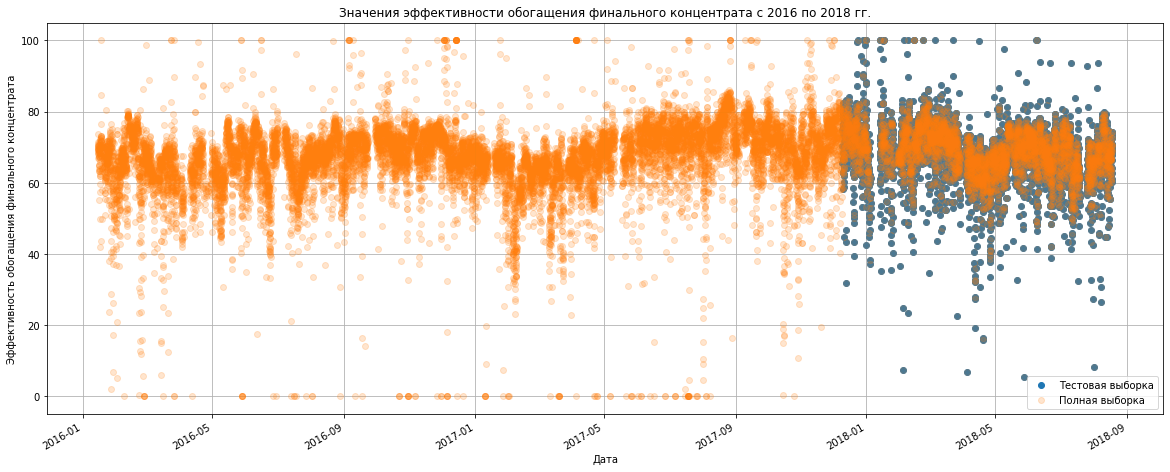

In [18]:
plt.figure(figsize=(15, 8))

df_test_new['final.output.recovery'].plot(grid=True, style='o', figsize=(20, 8), label='Тестовая выборка');
df_full['final.output.recovery'].plot(grid=True, style='o', figsize=(20, 8), alpha = 0.2, label='Полная выборка');

plt.xlabel('Дата')
plt.ylabel('Эффективность обогащения финального концентрата')
plt.title("Значения эффективности обогащения финального концентрата с 2016 по 2018 гг.")
plt.legend(loc='lower right')
plt.show()

- Данные обучающей выборки взяты из полной выборке за период с 2016-01-15 00:00:00 по 2017-12-09 13:59:59.
- Данные тестовой выборки взяты за период с 2017-12-09 14:59:59	по 2018-08-18 10:59:59.

**То есть данные в выборках расположены последовательно.**

**1.2. Проверим, верно ли рассчитана эффективность обогащения. Вычислим её на обучающей выборке для признака 'rougher.output.recovery'. Найдем MAE между расчётами и значением признака.**

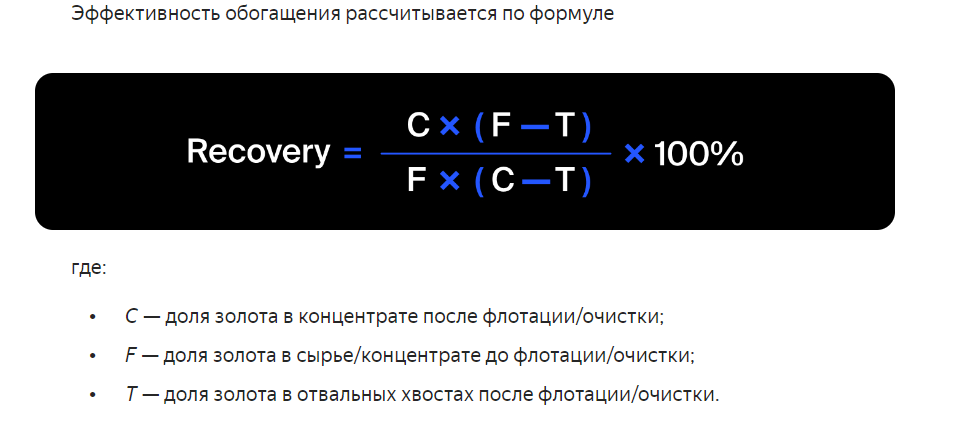

In [19]:
# создадим функцию для расчета MAE
def calc_recovery(df):
    C = df['rougher.output.concentrate_au'] # доля золота в концентрате после флотации
    F = df['rougher.input.feed_au'] # доля золота в сырье до флотации;
    T = df['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации.
    df_recovery = df['rougher.output.recovery'] # эффективность обогащения после флотации из обучающей выборки.
    calc_recovery = (C*(F-T))/(F*(C-T))*100 # рассчитанная эффективность обогащения после флотации.
    
    # cреднее абсолютное отклонение между df_recovery и calc_recovery.
    mae = mean_absolute_error(df_recovery, calc_recovery)
    
    return mae

In [20]:
print('Среднее абсолютное отклонение (MAE):', calc_recovery(df_train))

Среднее абсолютное отклонение (MAE): 9.83758577644259e-15


**Среднее абсолютное отклонение между эффективностью обогащения после флотации из обучающей выборки и рассчитанной эффективностью обогащения слишком мало, значит разницы в значениях данных параметров почти нет, эффективность рассчитана верно.**

**1.3. Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?**

In [21]:
# Выведем список столбцов которые есть в обучающей выборке и отсутствуют в тестовой выборке.
missing_columns = [i for i in df_train.columns if i not in df_test_new.columns]
print(len(missing_columns))
missing_columns

32


['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'f

- В тестовой выборке отсутствует 32 признака и 2 целевых признака ('final.output.recovery', 'rougher.output.recovery' их уже добавил).
- 9 признаков относятся к этапу флотации ('rougher'), 8 признаков - к этапу первичной очистки ('primary_cleaner'), 4 к вторичной очистке ('secondary_cleaner'), 9 признаков - к финальному этапу ('final') и 4 расчетные характеристики ('calculation').
- На всех этапах отсутствуют данные об отвальных хвостах (16) и концентрации (12).
- Вероятно данные признаки не будут доступны в продакшене, поэтому далее удалим их из обучающей выборки.

**1.4. Выполним предобработку данных.**

In [22]:
# сохраним список признаков обучающей выборки совпадающих с признаками тестовой выборки в переменную 'matching_columns'.
matching_columns = [i for i in df_train.columns if i in df_test_new.columns]
print(len(matching_columns))
matching_columns

54


['rougher.input.feed_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.output.recovery',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floa

In [23]:
#оставим признаки в обучающей выборке которые присутствуют в тестовой для дальнейшего обучения моделей.
df_train_new = df_train[matching_columns]

#проверим корректно ли подгрузились необходимые столбцы
print(len(df_train_new.columns))
display(df_train_new.columns)
df_train_new.head()

54


Index(['rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xant

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,87.107763,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,70.541216
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,11.996163,6.012594,86.843261,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,69.266198
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,11.920305,6.204633,86.842308,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,68.116445
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943

In [24]:
df_train_new.shape
display(df_train_new.isna().sum().sort_values(ascending=False))

rougher.state.floatbank10_e_air               429
rougher.input.floatbank11_xanthate            407
rougher.input.feed_size                       101
secondary_cleaner.state.floatbank2_a_air       94
rougher.input.feed_sol                         77
rougher.input.feed_pb                          72
primary_cleaner.input.xanthate                 61
rougher.input.floatbank11_sulfate              36
rougher.input.floatbank10_sulfate              31
primary_cleaner.input.depressant               28
primary_cleaner.input.sulfate                  23
secondary_cleaner.state.floatbank2_b_air       22
secondary_cleaner.state.floatbank3_a_air       12
rougher.input.floatbank10_xanthate              7
rougher.input.feed_rate                         7
secondary_cleaner.state.floatbank4_a_air        5
primary_cleaner.state.floatbank8_b_air          3
primary_cleaner.state.floatbank8_a_air          3
primary_cleaner.state.floatbank8_d_air          1
secondary_cleaner.state.floatbank6_a_air        1


In [25]:
#напишем функцию для заполнения пропусков предыдущими значениями, 
#так как соседние по времени параметры часто похожи (указано в условии задачи).

def fill_na(df):
    
    #сохраняем в список признаки, в которых есть пропущенные значения.
    columns_with_missing_values = df.columns[df.isna().any()]
    df[columns_with_missing_values] = df[columns_with_missing_values].fillna(method='ffill')
    

In [26]:
fill_na(df_train_new)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [27]:
display(df_train_new.isna().sum().sum())
df_train_new.shape

0

(14579, 54)

In [28]:
df_test_new.shape
display(df_test_new.isna().sum().sort_values(ascending=False))

secondary_cleaner.state.floatbank2_a_air      126
rougher.input.floatbank11_xanthate             46
rougher.input.feed_size                        44
primary_cleaner.input.xanthate                 43
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
primary_cleaner.input.depressant                9
rougher.input.floatbank11_sulfate               8
rougher.state.floatbank10_e_air                 7
rougher.input.feed_rate                         4
rougher.input.floatbank10_sulfate               3
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_d_air          2
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_level        1
secondary_cleaner.state.floatbank2_b_level      1
secondary_cleaner.state.floatbank2_a_level      1
secondary_cleaner.state.floatbank2_b_air        1
primary_cleaner.state.floatbank8_b_air          1


In [29]:
fill_na(df_test_new)

In [30]:
display(df_test_new.isna().sum().sum())
df_test_new.shape

0

(4860, 54)

**Функция заполнения сработала верно, пропусков нет.**

**Вывод:**

- В полной выборке (df_full) 19439 объектов и 87 колонок, из них 2 целевых признака 'rougher.output.recovery' и 'final.output.recovery'. Доля строк с хотябы одним пропущенным значением: 17.21 %.
- В обучающей выборке (df_train) 14579 объектов и 87 колонок, из них 2 целевых признака 'rougher.output.recovery' и 'final.output.recovery'. Доля строк с хотябы одним пропущенным значением: 15.38 %.
- В тестовой выборке (df_test) 4860 объектов и 53 колонки, при этом нет 32 признака из обучающей и полной выборок и 2-х целевых признака 'rougher.output.recovery' и 'final.output.recovery'. Как указано в описании проекта некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Исходя из этого для обучения модели нужно из обучающей выборки удалить признаки, которые не входят в тестовую выборку, а в тестовую выборку добавить целевые признаки. Доля строк с хотябы одним пропущенным значением: 6.65 %.
- Для удобства столбец с датами установлен в качестве индексного.
- На каждом этапе в полной и обучающей выборке у определенных параметров присутствует значительное количество нулевых значений. В тестовой выборке нулевых значений меньше.
- Данные обучающей выборки взяты из полной выборки за период с 2016-01-15 00:00:00 по 2017-12-09 13:59:59.
- Данные тестовой выборки взяты за период с 2017-12-09 14:59:59	по 2018-08-18 10:59:59.
- То есть данные в выборках расположены последовательно.
- Среднее абсолютное отклонение между эффективностью обогащения после флотации из обучающей выборки и рассчитанной эффективностью обогащения слишком мало, значит разницы в значениях данных параметров почти нет, эффективность рассчитана верно.
- В тестовой выборке отсутствует 32 признака и 2 целевых признака ('final.output.recovery', 'rougher.output.recovery').
- 9 признаков относятся к этапу флотации ('rougher'), 8 признаков - к этапу первичной очистки ('primary_cleaner'), 4 к вторичной очистке ('secondary_cleaner'), 9 признаков - к финальному этапу ('final') и 4 расчетные характеристики ('calculation').
- На всех этапах отсутствуют данные об отвальных хвостах (16) и концентрации (12).
- Из обучающей выборки удалены признаки, которых нет в тестовой выборке, так как их не будет в продакшене, кроме целевых признаков.
- В тестовую выборку добавлены целевые признаки.

## Анализ данных

**2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье (rougher.input.feed), в черновом концентрате (rougher.output.concentrate), в концентрате после первой очистки (primary_cleaner.output.concentrate) и в финальном концентрате (final.output.concentrate). Какие особенности имеют распределения?**

In [31]:
def get_hist(df, metal):
    columns = ['rougher.input.feed_' + metal.lower(), 
              'rougher.output.concentrate_' + metal.lower(), 
              'primary_cleaner.output.concentrate_' + metal.lower(), 
              'final.output.concentrate_' + metal.lower()]


    label_name = ['Концентрация ' + metal + ' в сырье' \
                  + ' (Среднее значение: ' + str(round(df[columns[0]].mean(),1)) + ')', 
                 'Концентрация ' + metal + ' в черновом концентрате' \
                  + ' (Среднее значение: ' + str(round(df[columns[1]].mean(),1)) + ')', 
                 'Концентрация ' + metal + ' после первичной очистки' \
                  + ' (Среднее значение: ' + str(round(df[columns[2]].mean(),1)) + ')', 
                 'Концентрация ' + metal + ' в финальном концентрате' \
                  + ' (Среднее значение: ' + str(round(df[columns[3]].mean(),1)) + ')',                  
                 'Распределение концентрации ' + metal]

    plt.figure(figsize=(20, 10))
    j = 0
    for i in columns:
        plt.hist(df[i], bins = 100, alpha = 0.5, label=label_name[j])
        j += 1

    plt.xlabel('Концентрация ' + metal + ' на различных этапах')
    plt.ylabel('Количество значений')
    plt.title(label_name[4])
    plt.legend(loc='upper left')
    plt.show()

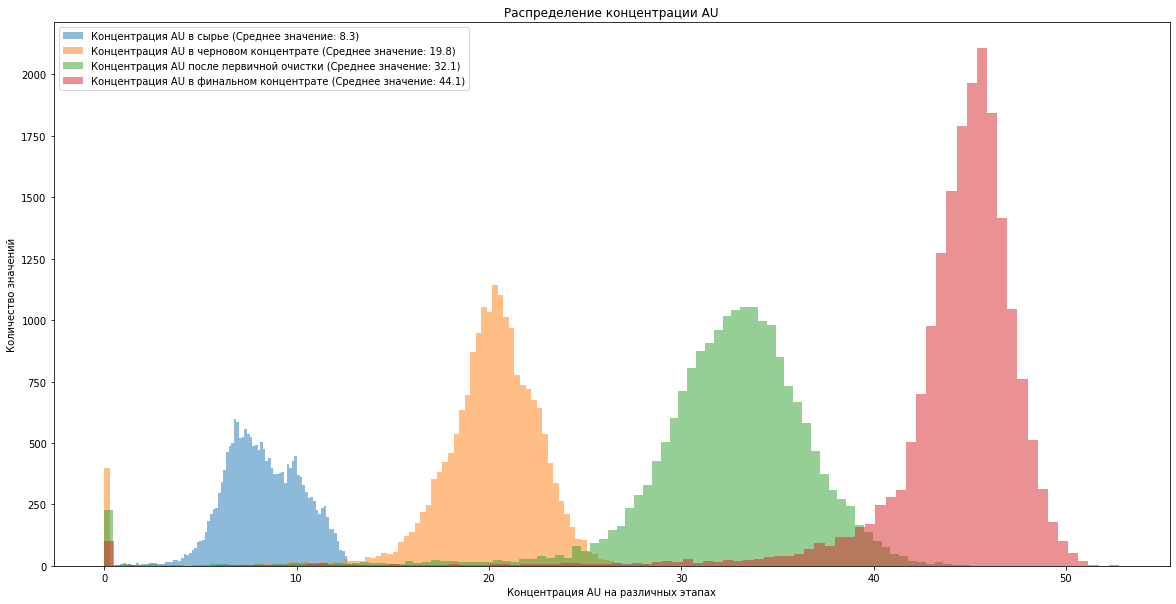

In [32]:
get_hist(df_full, 'AU')

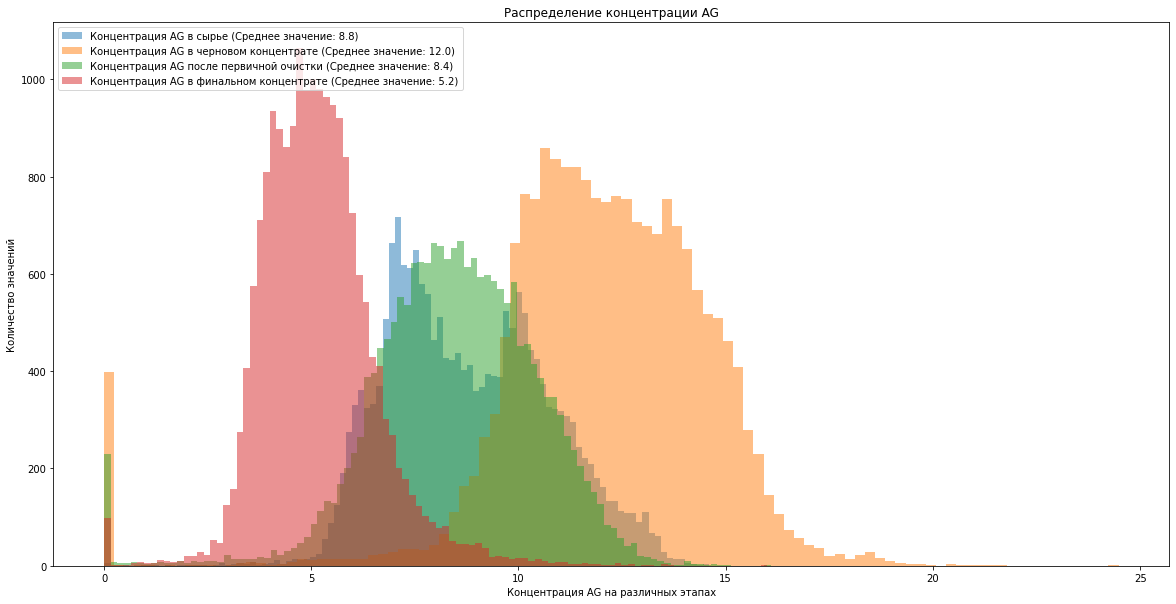

In [33]:
get_hist(df_full, 'AG')

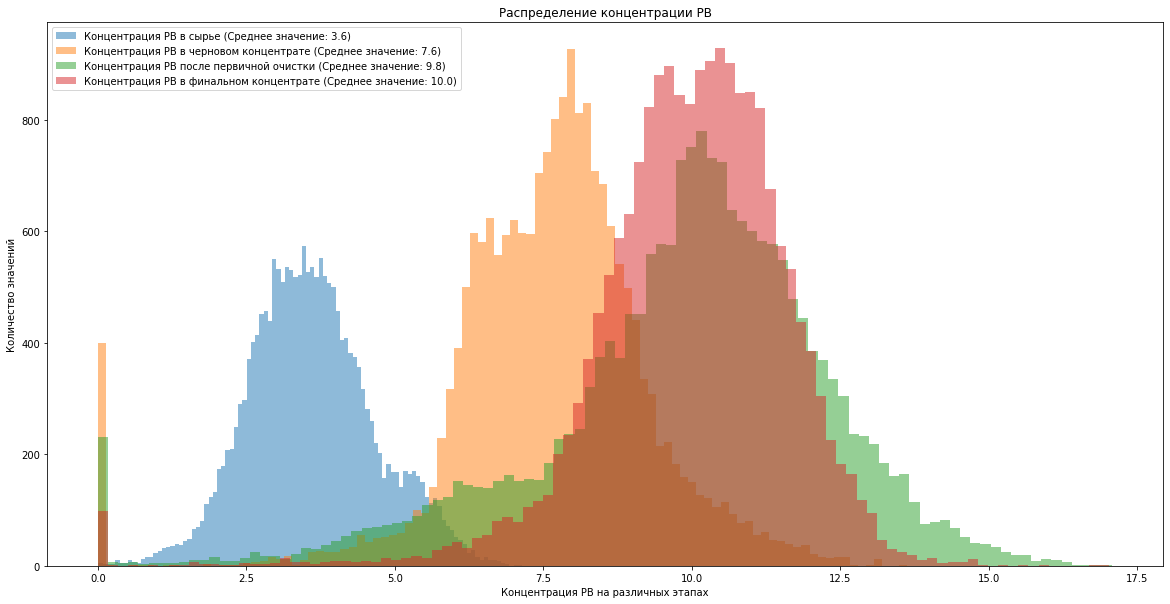

In [34]:
get_hist(df_full, 'PB')

- Отмечается значительное количество нулевых значений концентрации для каждого металла в черновом концентрате, после первой очистки и в финальном концентрате.
 - Распределения имеют практически нормальный вид.
 - Концентрация золота (AU) увеличивается с увеличением степени очистки, что логично.
 - Концентрация свинца (PB) тоже увеливается с увеличением степени очистки.
 - Концентрация серебра (AG) уменьшиается с увеличением степени очистки.

**Так как есть нулевые значения в концентрациях, то суммируем их в полной выборке и удалим из обучающей и тестовой выборок строки по индексам строк из полной выборки, в которых есть нулевые значения в столбцах суммарной концентрации.**

In [35]:
#напишем функцию которая создает столбцы с суммарными концентрациями в датафрейме
def sum_conc(df):
    columns = ['rougher.input.feed_', 
              'rougher.output.concentrate_', 
              'primary_cleaner.output.concentrate_', 
              'final.output.concentrate_']

    for i in columns:
        df[i + 'total'] = df[i + 'au'] + df[i + 'ag'] + df[i + 'pb']

In [36]:
#применим функцию 'sum_conc' к полной выборке.
sum_conc(df_full)
df_full.columns[85:]

Index(['final.output.tail_sol', 'rougher.input.feed_total',
       'rougher.output.concentrate_total',
       'primary_cleaner.output.concentrate_total',
       'final.output.concentrate_total'],
      dtype='object')

In [37]:
df_train_new.shape

(14579, 54)

In [38]:
df_train_new = df_train_new.drop(index=df_full[(df_full['rougher.input.feed_total'] == 0) | \
                                               (df_full['rougher.output.concentrate_total'] == 0) | \
                                               (df_full['primary_cleaner.output.concentrate_total'] == 0) | \
                                               (df_full['final.output.concentrate_total'] == 0)].index, axis=0)

In [39]:
#проверим правильно ли удалились строки
deleted_indexes_train = [i for i in df_full[(df_full['rougher.input.feed_total'] == 0) | \
                                      (df_full['rougher.output.concentrate_total'] == 0) | \
                                      (df_full['primary_cleaner.output.concentrate_total'] == 0) | \
                                      (df_full['final.output.concentrate_total'] == 0)].index if i in df_train_new.index]

In [40]:
display(deleted_indexes_train)
df_train_new.shape

[]

(13988, 54)

**Строки удалились верно, проверим есть ли в тестовой выборке такие строки.**

In [41]:
df_test_new.shape

(4860, 54)

In [42]:
deleted_indexes_test = [i for i in df_full[(df_full['rougher.input.feed_total'] == 0) | \
                                      (df_full['rougher.output.concentrate_total'] == 0) | \
                                      (df_full['primary_cleaner.output.concentrate_total'] == 0) | \
                                      (df_full['final.output.concentrate_total'] == 0)].index if i in df_test_new.index]

In [43]:
deleted_indexes_test

[]

**Получается что индексов строк из полной выборки с нулевыми суммарными концентрациями нет в тестовой выборке, удалять ничего не нужно.**

**Удалим строки с нулевой суммарной концентрацией в полной выборке, для дальнейшего анализа.**

In [44]:
df_full_new = df_full[(df_full['rougher.input.feed_total'] != 0) & \
                    (df_full['rougher.output.concentrate_total'] != 0) & \
                    (df_full['primary_cleaner.output.concentrate_total'] != 0) & \
                    (df_full['final.output.concentrate_total'] != 0)]

In [45]:
df_full_new[df_full_new['primary_cleaner.output.concentrate_total'] == 0]

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,rougher.input.feed_total,rougher.output.concentrate_total,primary_cleaner.output.concentrate_total,final.output.concentrate_total
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


**2.2.  Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Убедимся что распределения сильно не отличаются, иначе оценка модели будет неправильной.**

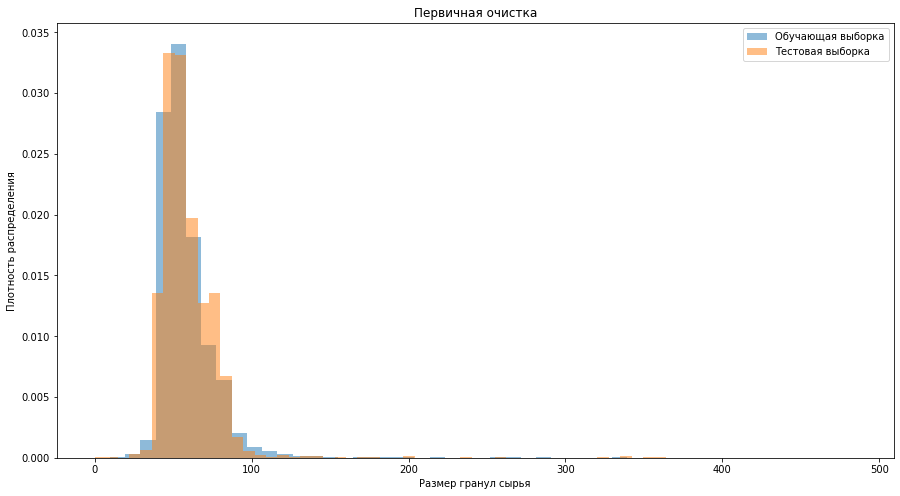

In [46]:
plt.figure(figsize=(15, 8))

plt.hist(df_train_new['rougher.input.feed_size'], bins = 50, alpha = 0.5, label='Обучающая выборка', density=True)
plt.hist(df_test_new['rougher.input.feed_size'], bins = 50, alpha = 0.5, label='Тестовая выборка', density=True)
plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность распределения')
plt.title("Первичная очистка")
plt.legend(loc='upper right')
plt.show()

**В целом распределения похожы, далее оценка модели будет корректной.**

**2.3. Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первичной очистки и в финальном концентрате.**

In [49]:
#напишем функцию для построения гистограмм распредения суммарных концентраций металлов для каждой стадии.
def get_total_hist(df):
        
    columns = ['rougher.input.feed_', 
              'rougher.output.concentrate_', 
              'primary_cleaner.output.concentrate_', 
              'final.output.concentrate_']
    label_name = ['Сырье', 
                  'Черновой концентрат', 
                  'Концентрат после первого этапа очистки', 
                  'Финальный концентрат']
        
    plt.figure(figsize=(20, 8))
    j = 0
    for i in columns:
        plt.hist(df[i + 'total'], bins = 50, alpha = 0.5, label=label_name[j])
        j += 1

    plt.xlabel('Суммарная концентрация металлов')
    plt.ylabel('Количество значений')
    plt.title("Суммарная концентрация металлов в зависимости от стадии")
    plt.legend(loc='upper left')
    plt.show()

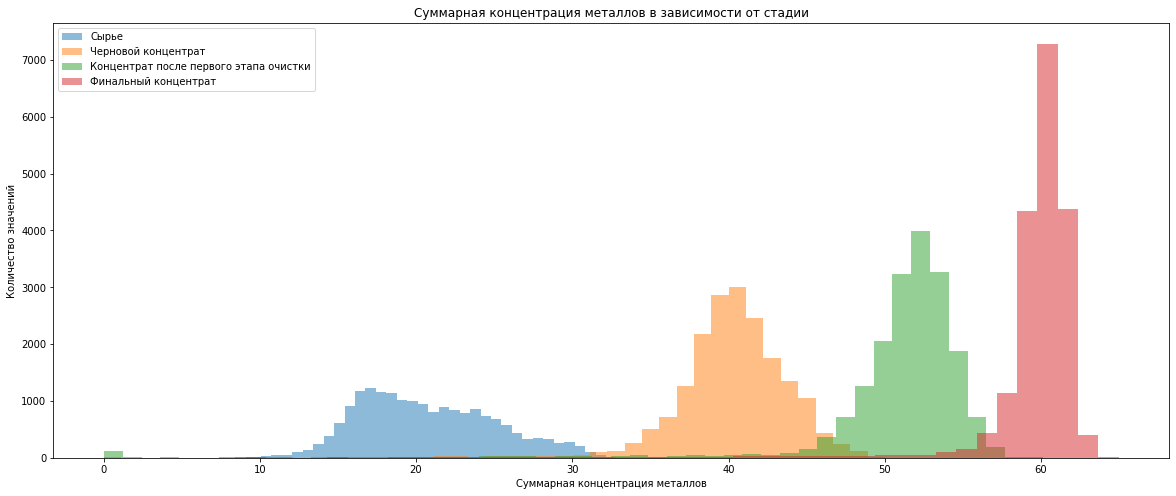

In [50]:
get_total_hist(df_full_new)

**Отмечается, что концентрация металлов увеличивается по мере прохождения этапов обработки, при этом разброс значений становится меньше.** ~~Также видны выбивающиеся околонулевые значения концентраций.**~~

**По результату анализа данных отмечается следующее:**
- Отмечается значительное количество нулевых значений концентрации для каждого металла в черновом концентрате, после первой очистки и в финальном концентрате.
- Распределения имеют практически нормальный вид.
- Концентрация золота (AU) увеличивается с увеличением степени очистки, что логично.
- Концентрация свинца (PB) тоже увеливается с увеличением степени очистки.
- Концентрация серебра (AG) уменьшиается с увеличением степени очистки.
- Рассчитана сумарная концентрация металлов в полной выборке и из обучающей и тестовой выборок удалены строки по индексам строк из полной выборки, в которых есть нулевые значения в столбцах с нулевой суммарной концентрацией. Также удалены строки с нулевой суммарной концентрацией в полной выборке.
- Выполнено сравнение размеров гранул исходного сырья на обучающей и тестовой выборках. Отмечена схожесть распределений значений размеров гранул исходного сырья, далее оценка модели будет корректной.
- Отмечается, что концентрация металлов увеличивается по мере прохождения этапов обработки, при этом разброс значений становится меньше.

## Модель

**3.1. Напишем функцию для вычисления итоговой sMAPE.**

In [58]:
def smape(target, predict):
    error = np.mean(abs(target - predict)/((abs(target)+abs(predict))/2))*100
    return error

In [59]:
def final_smape(smape_rougher, smape_final):
    return (0.25*smape_rougher + 0.75*smape_final)

In [60]:
smape_score = make_scorer(smape, greater_is_better=False)

**3.2. Обучим разные модели и оценим их качество кросс-валидацией.**

In [61]:
#Разобьем обучающую и тестовую выборки на признаки и целевые признаки
target_columns = ['rougher.output.recovery', 'final.output.recovery']
features_train = df_train_new.drop(target_columns, axis=1)
target_train_rougher = df_train_new[target_columns[0]]
target_train_final = df_train_new[target_columns[1]]

features_test = df_test_new.drop(target_columns, axis=1)
target_test_rougher = df_test_new[target_columns[0]]
target_test_final = df_test_new[target_columns[1]]

In [62]:
#масштабируем признаки
scaler = StandardScaler()    
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

**3.2.1. Линейная регрессия.**

In [63]:
%%time

model_linear = LinearRegression()
result_rougher_linear = abs(cross_val_score(model_linear, features_train, target_train_rougher, cv=5, scoring=smape_score))
result_rougher_train_linear = result_rougher_linear.mean()

result_final_linear = abs(cross_val_score(model_linear, features_train, target_train_final, cv=5, scoring=smape_score))
result_final_train_linear = result_final_linear.mean()

print("'sMAPE' в значениях чернового концентрата на модели линейной регрессии:", result_rougher_train_linear)
print("'sMAPE' в значениях финального концентрата на модели линейной регрессии:", result_final_train_linear)


final_score_train_linear = final_smape(result_rougher_train_linear, result_final_train_linear)

print("Финальная 'sMAPE' для модели линейной регрессии:", final_score_train_linear)

'sMAPE' в значениях чернового концентрата на модели линейной регрессии: 7.03918625186603
'sMAPE' в значениях финального концентрата на модели линейной регрессии: 9.477923458692691
Финальная 'sMAPE' для модели линейной регрессии: 8.868239156986025
CPU times: user 1.05 s, sys: 1.4 s, total: 2.45 s
Wall time: 2.47 s


**3.2.2. Дерево решений.**

In [64]:
%%time
#Обучим модели прогнозирующие 'rougher.output.recovery', 
#определим наилучшие гиперпараметры и sMAPE для лучшей модели дерева решений 


best_model_rougher_tree = None
best_depth_rougher_tree = 0
best_smape_rougher_train_tree = 1000
for depth in range(1, 11):
    model_rougher_tree = DecisionTreeRegressor(random_state=12345, max_depth=depth)    
    result_rougher_tree = abs(cross_val_score(model_rougher_tree, 
                                              features_train, 
                                              target_train_rougher, 
                                              cv=5, 
                                              scoring=smape_score))
    result_rougher_tree = result_rougher_tree.mean()
    if result_rougher_tree < best_smape_rougher_train_tree:
        best_model_rougher_tree = model_rougher_tree
        best_depth_rougher_tree = depth
        best_smape_rougher_train_tree = result_rougher_tree
        
print("Глубина 'Max_depth' лучшей модели:", best_depth_rougher_tree)
print("'sMAPE' в значениях чернового концентрата на модели дерева решений:", best_smape_rougher_train_tree)

Глубина 'Max_depth' лучшей модели: 6
'sMAPE' в значениях чернового концентрата на модели дерева решений: 6.706010046229364
CPU times: user 15.2 s, sys: 19.9 ms, total: 15.2 s
Wall time: 15.3 s


In [65]:
%%time
#Обучим модели прогнозирующие 'final.output.recovery', 
#определим наилучшие гиперпараметры и sMAPE для лучшей модели дерева решений 


best_model_final_tree = None
best_depth_final_tree = 0
best_smape_final_train_tree = 1000
for depth in range(1, 11):
    model_final_tree = DecisionTreeRegressor(random_state=12345, max_depth=depth)    
    result_final_tree = abs(cross_val_score(model_final_tree, 
                                              features_train, 
                                              target_train_final, 
                                              cv=5, 
                                              scoring=smape_score))
    result_final_tree = result_final_tree.mean()
    if result_final_tree < best_smape_final_train_tree:
        best_model_final_tree = model_final_tree
        best_depth_final_tree = depth
        best_smape_final_train_tree = result_final_tree
        
print("Глубина 'Max_depth' лучшей модели:", best_depth_final_tree)
print("'sMAPE' в значениях финального концентрата на модели дерева решений:", best_smape_final_train_tree)

Глубина 'Max_depth' лучшей модели: 3
'sMAPE' в значениях финального концентрата на модели дерева решений: 9.151524513511033
CPU times: user 15.1 s, sys: 2.15 ms, total: 15.1 s
Wall time: 15.1 s


In [66]:
#рассчитаем финальный sMAPE
final_score_train_tree = final_smape(best_smape_rougher_train_tree, best_smape_final_train_tree)

print("Финальная 'sMAPE' для модели дерева решений:", final_score_train_tree)

Финальная 'sMAPE' для модели дерева решений: 8.540145896690616


**3.2.3. Случайный лес**

In [67]:
%%time
#Обучим модели прогнозирующие 'rougher.output.recovery', 
#определим наилучшие гиперпараметры и sMAPE для лучшей модели случайного леса 

best_model_rougher_forest = None
best_est_rougher_forest = 0
best_depth_rougher_forest = 0
best_smape_rougher_train_forest = 1000
for est in range(10, 51, 10):
    for depth in range(1, 6):
        model_rougher_forest = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        result_rougher_forest = abs(cross_val_score(model_rougher_forest, 
                                        features_train, 
                                        target_train_rougher, 
                                        cv=5, 
                                        scoring=smape_score))
        result_rougher_forest = result_rougher_forest.mean()
        if result_rougher_forest < best_smape_rougher_train_forest:
            best_model_rougher_forest = model_rougher_forest
            best_est_rougher_forest = est
            best_depth_rougher_forest = depth
            best_smape_rougher_train_forest = result_rougher_forest

print("Количество деревьев 'Estimators' лучшей модели:", best_est_rougher_forest)
print("Глубина 'Max_depth' лучшей модели:", best_depth_rougher_forest)
print("'sMAPE' в значениях чернового концентрата на модели случайного леса:", best_smape_rougher_train_forest)

Количество деревьев 'Estimators' лучшей модели: 40
Глубина 'Max_depth' лучшей модели: 5
'sMAPE' в значениях чернового концентрата на модели случайного леса: 6.582651268807355
CPU times: user 6min 45s, sys: 388 ms, total: 6min 45s
Wall time: 6min 46s


In [68]:
%%time
#Обучим модели прогнозирующие 'final.output.recovery', 
#определим наилучшие гиперпараметры и sMAPE для лучшей модели случайного леса 

best_model_final_forest = None
best_est_final_forest = 0
best_depth_final_forest = 0
best_smape_final_train_forest = 1000
for est in range(10, 51, 10):
    for depth in range(1, 6):
        model_final_forest = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        result_final_forest = abs(cross_val_score(model_final_forest, 
                                        features_train, 
                                        target_train_final, 
                                        cv=5, 
                                        scoring=smape_score))
        result_final_forest = result_final_forest.mean()
        if result_final_forest < best_smape_final_train_forest:
            best_model_final_forest = model_final_forest
            best_est_final_forest = est
            best_depth_final_forest = depth
            best_smape_final_train_forest = result_final_forest

print("Количество деревьев 'Estimators' лучшей модели:", best_est_final_forest)
print("Глубина 'Max_depth' лучшей модели:", best_depth_final_forest)
print("'sMAPE' в значениях финального концентрата на модели случайного леса:", best_smape_final_train_forest)

Количество деревьев 'Estimators' лучшей модели: 50
Глубина 'Max_depth' лучшей модели: 2
'sMAPE' в значениях финального концентрата на модели случайного леса: 8.839884376056805
CPU times: user 6min 52s, sys: 409 ms, total: 6min 53s
Wall time: 6min 53s


In [69]:
#рассчитаем финальный sMAPE
final_score_train_forest = final_smape(best_smape_rougher_train_forest, best_smape_final_train_forest)

print("Финальная 'sMAPE' для модели случайного леса:", final_score_train_forest)

Финальная 'sMAPE' для модели случайного леса: 8.275576099244443


In [70]:
#занесем результаты в отдельный датафрейм
model_type = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
smape_rougher = [result_rougher_train_linear, best_smape_rougher_train_tree, best_smape_rougher_train_forest]
smape_final = [result_final_train_linear, best_smape_final_train_tree, best_smape_final_train_forest]
final_score = [final_score_train_linear, final_score_train_tree, final_score_train_forest]


result = pd.DataFrame({'Model Type': model_type,
                           'sMAPE Rougher': smape_rougher,
                           'sMAPE Final': smape_final,
                           'Final Score': final_score,                           
                         })

result

,Model Type,sMAPE Rougher,sMAPE Final,Final Score
0,Linear Regression,7.039186,9.477923,8.868239
1,Decision Tree Regressor,6.706010,9.151525,8.540146
2,Random Forest Regressor,6.582651,8.839884,8.275576


**В результате обучения моделей наилучшей оказалась модель случайного леса со следующими гиперпараметрами:**
- для предсказания эффективности обогащения чернового концентрата 'rougher.output.recovery': количество деревьев 'Estimators' лучшей модели - 40; глубина 'Max_depth' лучшей модели - 5.
- для предсказания эффективности обогащения финального концентрата 'final.output.recovery': количество деревьев 'Estimators' лучшей модели - 50, глубина 'Max_depth' лучшей модели - 2.

**Финальная sMAPE на обучающей выборке модели случайного леса равна 8,28.**
**Далее обучим модели случайного леса на обучающей выборке с лучшими гиперпараметрами и протестируем их на тестовой выборке, расчитаем sMAPE.**

In [71]:
%%time
best_model_rougher_forest = RandomForestRegressor(random_state=12345, n_estimators=40, max_depth=5)
best_model_rougher_forest.fit(features_train, target_train_rougher)

CPU times: user 8.81 s, sys: 3.98 ms, total: 8.81 s
Wall time: 8.82 s


RandomForestRegressor(max_depth=5, n_estimators=40, random_state=12345)

In [72]:
%%time
best_model_final_forest = RandomForestRegressor(random_state=12345, n_estimators=50, max_depth=2)
best_model_final_forest.fit(features_train, target_train_final)

CPU times: user 4.84 s, sys: 0 ns, total: 4.84 s
Wall time: 4.84 s


RandomForestRegressor(max_depth=2, n_estimators=50, random_state=12345)

In [73]:
prediction_rougher_forest = best_model_rougher_forest.predict(features_test)
prediction_final_forest = best_model_final_forest.predict(features_test)

best_smape_rougher_test_forest = smape(target_test_rougher, prediction_rougher_forest)
best_smape_final_test_forest = smape(target_test_final, prediction_final_forest)

final_score_test_forest = final_smape(best_smape_rougher_test_forest, best_smape_final_test_forest)

print("'sMAPE' в значениях чернового концентрата на модели случайного леса на тестовой выборке:", \
      best_smape_rougher_test_forest)
print("'sMAPE' в значениях финального концентрата на модели случайного леса на тестовой выборке:", \
      best_smape_final_test_forest)
print("Финальная 'sMAPE' для модели случайного леса на тестовой выборке:", \
      round(final_score_test_forest, 2))

'sMAPE' в значениях чернового концентрата на модели случайного леса на тестовой выборке: 3.940765181316186
'sMAPE' в значениях финального концентрата на модели случайного леса на тестовой выборке: 8.455037180462472
Финальная 'sMAPE' для модели случайного леса на тестовой выборке: 7.33


**Проверим нашу модель на адекватность**

In [74]:
model_dummy_rougher = DummyRegressor(strategy="median")
model_dummy_rougher.fit(features_train, target_train_rougher)
dummy_rougher_pred = model_dummy_rougher.predict(features_test)
smape_dummy_rougher = smape(target_test_rougher, dummy_rougher_pred)

print("'sMAPE' в значениях чернового концентрата на dummy модели:", smape_dummy_rougher)

'sMAPE' в значениях чернового концентрата на dummy модели: 5.835969960413102


In [75]:
model_dummy_final = DummyRegressor(strategy="median")
model_dummy_final.fit(features_train, target_train_final)
dummy_final_pred = model_dummy_final.predict(features_test)
smape_dummy_final = smape(target_test_final, dummy_final_pred)

print("'sMAPE' в значениях чернового концентрата на dummy модели:", smape_dummy_final)

'sMAPE' в значениях чернового концентрата на dummy модели: 9.11454843929903


In [76]:
final_score_smape_dummy = final_smape(smape_dummy_rougher, smape_dummy_final)

print("Финальная 'sMAPE' для dummy модели:", round(final_score_smape_dummy, 2))

Финальная 'sMAPE' для dummy модели: 8.29


**Финальная оценка sMAPE на тестовой выборке составила 7,33, что меньше финальнай оценки sMAPE на Dummy модели, что указывает на адекватность нашей модели**

## Общий вывод

**Изучены и подготовлены данные:**

- В полной выборке (df_full) 19439 объектов и 87 колонок, из них 2 целевых признака 'rougher.output.recovery' и 'final.output.recovery'. Доля строк с хотябы одним пропущенным значением: 17.21 %.
- В обучающей выборке (df_train) 14579 объектов и 87 колонок, из них 2 целевых признака 'rougher.output.recovery' и 'final.output.recovery'. Доля строк с хотябы одним пропущенным значением: 15.38 %.
- В тестовой выборке (df_test) 4860 объектов и 53 колонки, при этом нет 32 признака из обучающей и полной выборок и 2-х целевых признака 'rougher.output.recovery' и 'final.output.recovery'. Как указано в описании проекта некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Исходя из этого для обучения модели нужно из обучающей выборки удалить признаки, которые не входят в тестовую выборку, а в тестовую выборку добавить целевые признаки. Доля строк с хотябы одним пропущенным значением: 6.65 %.
- Для удобства столбец с датами установлен в качестве индексного.
- На каждом этапе в полной и обучающей выборке у определенных параметров присутствует значительное количество нулевых значений. В тестовой выборке нулевых значений меньше.
- Данные обучающей выборки взяты из полной выборки за период с 2016-01-15 00:00:00 по 2017-12-09 13:59:59.
- Данные тестовой выборки взяты за период с 2017-12-09 14:59:59	по 2018-08-18 10:59:59.
- То есть данные в выборках расположены последовательно.
- Среднее абсолютное отклонение между эффективностью обогащения после флотации из обучающей выборки и рассчитанной эффективностью обогащения слишком мало, значит разницы в значениях данных параметров почти нет, эффективность рассчитана верно.
- В тестовой выборке отсутствует 32 признака и 2 целевых признака ('final.output.recovery', 'rougher.output.recovery').
- 9 признаков относятся к этапу флотации ('rougher'), 8 признаков - к этапу первичной очистки ('primary_cleaner'), 4 к вторичной очистке ('secondary_cleaner'), 9 признаков - к финальному этапу ('final') и 4 расчетные характеристики ('calculation').
- На всех этапах отсутствуют данные об отвальных хвостах (16) и концентрации (12).
- Из обучающей выборки удалены признаки, которых нет в тестовой выборке, так как их не будет в продакшене, кроме целевых признаков.
- В тестовую выборку добавлены целевые признаки.

**По результату анализа данных отмечается следующее:**
- Отмечается значительное количество нулевых значений концентрации для каждого металла в черновом концентрате, после первой очистки и в финальном концентрате.
- Распределения имеют практически нормальный вид.
- Концентрация золота (AU) увеличивается с увеличением степени очистки, что логично.
- Концентрация свинца (PB) тоже увеливается с увеличением степени очистки.
- Концентрация серебра (AG) уменьшиается с увеличением степени очистки.
- Рассчитана сумарная концентрация металлов в полной выборке и из обучающей и тестовой выборок удалены строки по индексам строк из полной выборки, в которых есть нулевые значения в столбцах с нулевой суммарной концентрацией. Также удалены строки с нулевой суммарной концентрацией в полной выборке.
- Выполнено сравнение размеров гранул исходного сырья на обучающей и тестовой выборках. Отмечена схожесть распределений значений размеров гранул исходного сырья, далее оценка модели будет корректной.
- Отмечается, что концентрация металлов увеличивается по мере прохождения этапов обработки, при этом разброс значений становится меньше.

**Модели:**

- Написаны функции для вычисления итоговой sMAPE.
- В результате обучения моделей наилучшей оказалась модель случайного леса со следующими гиперпараметрами: 
    - для предсказания эффективности обогащения чернового концентрата 'rougher.output.recovery': количество деревьев 'Estimators' лучшей модели - 40; глубина 'Max_depth' лучшей модели - 5. 
    - для предсказания эффективности обогащения финального концентрата 'final.output.recovery': количество деревьев 'Estimators' лучшей модели - 50, глубина 'Max_depth' лучшей модели - 2.

- Финальная sMAPE на обучающей выборке модели случайного леса равна 8,28.
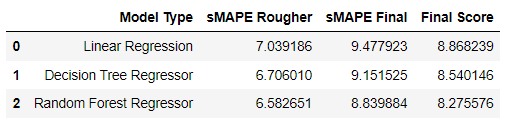

- Финальная оценка sMAPE на тестовой выборке составила 7,33, что меньше финальнай оценки sMAPE на Dummy модели, что указывает на адекватность нашей модели.

**Можно запускать модель в продакшн.**